# @Holger Elias Rivera Espinola
# PROGRAMA DE RECONHECIMENTO DE PADRÕES
# CLASSIFICAÇÃO - REGRESSÃO LOGÍSTICA
-----------------------------------------------------------------------------------------------

# PROBLEMA 03: CLASSIFICAÇÃO LINEAR - BRACA1 VS BRACA2

1) Carregar os dados do arquivo .csv e lê-os em um dataset.

In [3]:
#leitura dos dados do arquivo csv
from csv import reader
#carregamento dos dados do arquivo csv
def load_csv(filename):
    file=open(filename,"r")
    lines=reader(file)
    dataset=list(lines)
    return dataset
#executar leitura do arquivo csv
filename='data_breast_cancer.csv'
dataset=load_csv(filename)
print('Dados carregados arquivo {0} com #filas: {1} e #colunas: {2}'.format(filename,len(dataset),len(dataset[0])))

Dados carregados arquivo data_breast_cancer.csv com #filas: 3228 e #colunas: 23


2)	Criar um dataset para o problema 3 que tenha a seguinte forma:

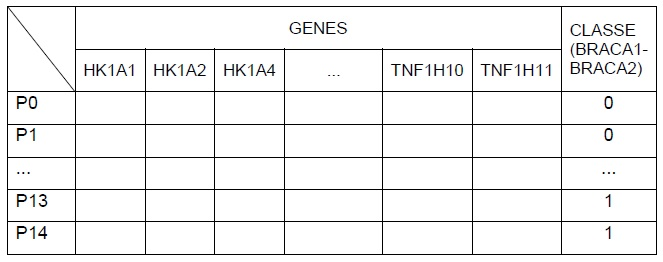

In [4]:
from IPython.display import Image
Image('Untitled Folder/tz1.jpg')

In [5]:
#seleção dos dados para o problema 3: separando o braca1 do braca2
datasetp3=[]
j1=0
for j in range(1,len(dataset[0])):
    if dataset[-1][j]=='BRACA1':
        datasetp3.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp3[j1][-1]=0
        j1=j1+1
    elif dataset[-1][j]=='BRACA2':
        datasetp3.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp3[j1][-1]=1
        j1=j1+1

#vista dos dados
#print(datasetp3)

3) Criar uma lista que tenha os dados para uma variável gene com 2 sublistas uma para a classe 0 (braca1) 
   e outra para a classe 1(braca2).

In [4]:
#criacao do x1 (braca1) e x2 (braca2)
def braca1_braca2(gene):
    lbraca=[]
    braca1=[]
    braca2=[]
    ib1=0
    ib2=0
    for i in range(len(datasetp3)):
        if datasetp3[i][-1]==0:  #carateristica pertence a braca1
            braca1.insert(ib1,float(datasetp3[i][gene]))
            ib1=ib1+1
        else: #carateristica pertence a braca2
            braca2.insert(ib2,float(datasetp3[i][gene]))
            ib2=ib2+1
    lbraca.insert(0,braca1)
    lbraca.insert(1,braca2)
    return lbraca

#exemplo: para gene 271 e 1442
print(braca1_braca2(271))
print(braca1_braca2(1442))

[[2.05, 1.88, 1.52, 1.64, 1.67, 1.19, 1.59], [1.51, 1.3, 1.03, 1.39, 0.6613, 0.6689, 0.6924, 1.2432]]
[[1.19, 1.64, 1.44, 1.64, 1.07, 1.63, 1.52], [0.68, 0.95, 0.83, 0.63, 0.7916, 0.6842, 0.6891, 0.8303]]


4) Criando os vetores Sn por cada combinação de pares de genes:

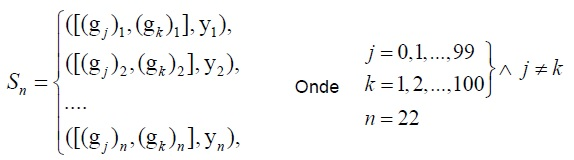

In [6]:
Image('Untitled Folder/tx2.jpg')

In [5]:
#criacao do sn={[(gene_a)i,(gene_b)i],yi}
def criar_sn(genea,geneb):
    sn=[]
    x=[]
    y=[]
    x=braca1_braca2(genea)
    y=braca1_braca2(geneb)
    for i in range(0,len(x[0])):
        sn.insert(i,[x[0][i],y[0][i],0])
    for i in range(0,len(x[1])):
        sn.insert((len(x[0]))+i,[x[1][i],y[1][i],1])
    return sn

#exemplo: criar um sn para genes 271 e 1442
print(criar_sn(271,1442))

[[2.05, 1.19, 0], [1.88, 1.64, 0], [1.52, 1.44, 0], [1.64, 1.64, 0], [1.67, 1.07, 0], [1.19, 1.63, 0], [1.59, 1.52, 0], [1.51, 0.68, 1], [1.3, 0.95, 1], [1.03, 0.83, 1], [1.39, 0.63, 1], [0.6613, 0.7916, 1], [0.6689, 0.6842, 1], [0.6924, 0.6891, 1], [1.2432, 0.8303, 1]]


5) Função Linear

Dada para uma função linear o vetor de coeficientes $w=(b,w_1,w_2)$ e o vetor de pontos $x=(x_1,x_2)$, o valor da função linear se obtém pela equação: 
$$f(w,x)=b+w_1\cdot x_1+w_2\cdot x_2 $$

In [6]:
#funcao linear: f(w,x)=b+w1*x1+w2*x2
def linear(coef,ponto):
    soma=coef[0]
    for i in range(len(ponto)):
        soma=soma+coef[i]*ponto[i]
    return soma

6) Função Sigmoide: 

Função básica que devolve valores entre 0 e 1, assegurando que os valores obtidos representam de fato uma probabilidade.
$$s(z) = \frac{1}{1 + e^{-z}}$$


In [7]:
#funcao sigmoide: s(z)=1/(1+exp(-z))
def sigmoide(z):
    from math import exp
    from math import fabs
    if fabs(z)>0 and fabs(z)<1e-3:
        z=z/fabs(z)*1e-3
    if fabs(z)>100:
        z=z/fabs(z)*100
    return 1.0/(1+exp(-z))

7)	Função Probabilidade

Dado os coeficientes de um classificador linear e um ponto, calculamos a probabilidade de ocorrência dos pontos:
$$h([b,w_1,w_2],[x_1,x_2])=\frac{1}{1 + e^{-(b+w_1\cdot x_1+w_2\cdot x_2)}}$$

In [8]:
#funcao probabilidade: h([b,w1,w2],[x1,x2])=1/(1+exp(-(b+w1*x1+w2*x2)))
def probabilidade(coef,ponto):
    z=linear(coef,ponto)
    return sigmoide(z)

8) Função ganho

Dado um conjunto de treinamento $S_n=\{(x_1,y_1),\ldots,(x_n,y_n)\}$ e os coeficientes de uma função linear  $w=(b,w_1,w_2)$,
a função ganho está definida como a função likelihood:

$$J([b,w_1,w_2],S_n)=\sum_{i=1}^{n}y_{i}log(h([b,w_1,w_2],[x_1,x_2]_{i})) + (1-y_{i})log(1-h([b,w_1,w_2],[x_1,x_2]_{i}))$$

In [9]:
#funcao ganho: J([b,w1,w2],Sn)=sum( (yi*log(h([b,w1,w2],[x1,x2]))) + ((1-yi)*log(1-h([b,w1,w2],[x1,x2]))) ), i=i...n
def ganho(coef,sn):
    from math import log
    soma=0
    for x_y in sn:
        ponto=[0,x_y[0],x_y[1]]
        classe=x_y[2]
        p=probabilidade(coef,ponto)
        if p<1e-20:
            p=1e-20
        if (1-p)<1e-10:
            p=1-(1e-10)
        soma=soma+(classe*log(p))+((1-classe)*log(1-p))
    return soma

9) Gradiente descendente

A gradiente para $J([b,w_1,w_2],S_n)$ é o vetor:
$$\nabla J=\left(\frac{\partial J([b,w_1,w_2],S_n)}{\partial b}, \frac{\partial J([b,w_1,w_2],S_n)}{\partial w_1},  \frac{\partial J([b,w_1,w_2],S_n)}{\partial w_2}\right)$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial b}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial w_1}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)\cdot [x_1]_{i}$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial w_2}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)\cdot [x_2]_{i}$$

 A gradiente descendente se obtêm com o seguinte método:

 1. Obter o primeiro classificador linear  $(b,w_1,w_2)_0$ de forma aleatoria.
 2. Computar $\Delta b= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial b}$
 3. Computar $\Delta w_1= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial w_1}$
 4. Computar $\Delta w_2= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial w_2}$
 5. Atualizar $(b,w_1,w_2)_1 = (b,w_1,w_2)_0+ \gamma(\Delta b, \Delta w_1, \Delta w_2)$
 6. O $(b,w_1,w_2)_0$ se converte em $(b,w_1,w_2)_1$
 7. Repetir o processo 2 ao 6 até convergir

In [10]:
#funcao gradiente descendente
def gradiente(coef,sn):
    learning_rate=[10000,1000,100,10,5,3,2,1,0.5,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001,3e-5,1e-5]
    current_value=ganho(coef,sn)
    delta_b=0
    delta_w1=0
    delta_w2=0
    for x_y in sn:
        ponto=[0,x_y[0],x_y[1]]
        classe=x_y[2]
        prob=probabilidade(coef,ponto)
        delta_b=delta_b+(classe-prob)
        delta_w1=delta_w1+(classe-prob)*ponto[1]
        delta_w2=delta_w2+(classe-prob)*ponto[2]
    real_rate=0
    for rate in learning_rate:
        after_value=ganho([(coef[0]+rate*delta_b),(coef[1]+rate*delta_w1),(coef[2]+rate*delta_w2)],sn)
        if after_value>current_value:
            real_rate=rate
            break;
    coef[0]=coef[0]+rate*delta_b
    coef[1]=coef[1]+rate*delta_w1
    coef[2]=coef[2]+rate*delta_w2
    return coef


10)	Obtenção dos coeficientes com o menor ganho possível

In [18]:
#funcao para obter os coeficientes otimizados [b*,w*]
def gradiente_learning(coef,sn):
    current_value=ganho(coef,sn)
    coef=gradiente(coef,sn)
    after_value=ganho(coef,sn)
    precisao=0
    while current_value<after_value and (abs(current_value-after_value)<1e-5 or precisao<50):
        current_value=after_value
        coef=gradiente(coef,sn)
        after_value=ganho(coef,sn)
        precisao=precisao+1
    return coef

#exemplo: obter os coef otimizados para genes 271 e 1442
coefx=[1,1,1]
snx=criar_sn(271,1442)
coefx=gradiente_learning(coefx,snx)
print(coefx)
print(ganho(coefx,snx))

[6438.3968074087725, -1466.1526922133048, -4585.90112481933]
-8.000000662322968e-10


11)	Lista de ganhos por cada combinação de genes.

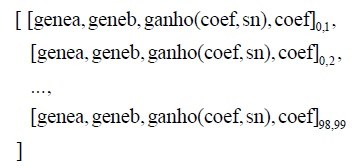

In [7]:
Image('Untitled Folder/tx6.jpg')

In [19]:
#funcao para criar lista de ganhos
def lista_ganhos(datasetp3):
    k=0
    lganhos=[]
    for i in range(0,99):
        for j in range(i+1,100): 
            coef=[1,1,1]
            sn=[]
            sn=criar_sn(i,j)
            coef=gradiente_learning(coef,sn)
            lganhos.insert(k,[i,j,round(ganho(coef,sn),4),coef])
            k=k+1
    return lganhos

#verificando a lista de ganhos para todas as combinacoes dos 
#100 primeiros pares de genes
lg=[]
lg=lista_ganhos(datasetp3)
print(lg)

[[0, 1, -6.4143, [0.9560345078341081, 3.785105497835486, -3.9855629780617776]], [0, 2, -7.8756, [-1.7928751440524258, 3.3953833730358247, -0.06785579900538959]], [0, 3, -5.9745, [-5.350561966359651, 3.2269779063456983, 2.0272702703122847]], [0, 4, -7.5794, [-3.3101425228217978, 3.800209510393349, 0.7855641981468485]], [0, 5, -7.5997, [-0.21469210421594728, 3.6845917189572766, -1.74507127130785]], [0, 6, -7.816, [-2.4077189103336227, 3.5464309472149065, 0.3734947414352417]], [0, 7, -6.2192, [0.31760255308307245, 3.537082752004432, -6.098322287252671]], [0, 8, -7.7366, [-0.6620471004334268, 3.281792423900273, -1.077818613854717]], [0, 9, -3.5396, [4.631990519176738, 1.5482620643386649, -8.07538179525756]], [0, 10, -6.7027, [-4.029147292693828, 3.502622428100391, 1.983430107570789]], [0, 11, -5.6273, [2.1559251559591686, 2.6507007075140008, -5.823872180461522]], [0, 12, -7.706, [-0.917180741299012, 3.4099543537446673, -0.6258772513824825]], [0, 13, -7.4899, [-3.2600772044762993, 3.7012821

12)	Escolher os 10 melhores ganhos e identificar os genes dos quais pertencem

In [20]:
#funcao para ordenar e escolher top10
def select_top10(lganhos):
    top10=[]
    lganhos.sort(reverse=True,key=lambda x:x[2])
    for i in range(0,10):
        top10.insert(i,lganhos[i])
    return top10

#obtendo a lista dos 10 melhores
best10x=[]
best10x=select_top10(lg)
print(best10x)

[[3, 60, -0.4034, [0.18002382120532945, 23.782516706370487, -21.033648742029303]], [10, 28, -0.5199, [32.27864768486631, 47.44539984582543, -47.01995732838107]], [34, 94, -0.6922, [-80.94260695145559, 47.69955410137921, 13.240005184694578]], [1, 34, -0.7888, [-3.1967464064177373, -9.82503850193216, 10.079865878469866]], [21, 28, -0.9589, [36.32762464724947, -13.064972610641593, -16.176527817308937]], [1, 95, -1.1316, [-3.446829453296495, -18.059562084152176, 9.256090477216764]], [34, 81, -1.1751, [-1.2421059583884662, 11.768078066442552, -27.461984749057777]], [93, 94, -1.2034, [-0.016100572667672314, -8.647081459304081, 4.497800974038998]], [9, 51, -1.2373, [42.26446748532137, -50.43003689208286, -4.505292408727985]], [17, 22, -1.2401, [-15.820104156423582, 32.772829299927295, -18.94884887253658]]]


13)	Criar reta a partir dos coeficientes otimizados na equação

In [21]:
#funcao para criar uma reta
def gerar_reta(coef,sn):
    r=[]
    x=[i for i in range(0,4)]
    y=[-(coef[0]/coef[2])-(coef[1]/coef[2])*a for a in x]
    r.insert(0,x)
    r.insert(1,y)
    return r

#exemplo: obter a reta apartir dos coef otimizados para genes 271 e 1442
print(gerar_reta(coefx,snx))

[[0, 1, 2, 3], [1.4039545625097674, 1.084245817748929, 0.7645370729880906, 0.44482832822725227]]


14)	Criar relatório da gráfica com os pontos e a reta de coeficientes otimizados

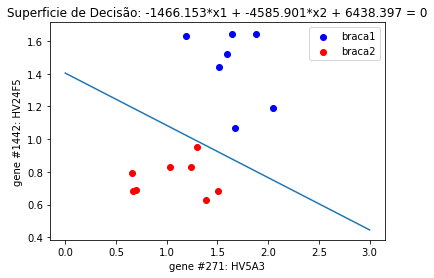

In [22]:
#criar relatorio de gráfica com os pontos e a reta de coef otimizados
import matplotlib.pyplot as plt
%matplotlib inline

def relatorio(coef,sn,genea,geneb):
    plt.xlabel("gene #"+str(genea)+": "+dataset[genea+1][0])
    plt.ylabel("gene #"+str(geneb)+": "+dataset[geneb+1][0])
    plt.title("Superficie de Decisão: "+str(round(coef[1],3))+"*x1 + "+str(round(coef[2],3))+"*x2 + "+str(round(coef[0],3))+" = 0")
    x=[]
    y=[]
    r=gerar_reta(coef,sn)
    x=braca1_braca2(genea)
    y=braca1_braca2(geneb)
    a1=plt.scatter(x[0],y[0],c='b')
    a2=plt.scatter(x[1],y[1],c='r')
    plt.legend((a1,a2),("braca1","braca2"))
    plt.plot(r[0],r[1])

#exemplo: gerar a gráfica para os genes 271 e 1442
relatorio(coefx,snx,271,1442)

15) Obter iterativamente o relatório dos 10 melhores pares de genes (ou seja os que geram os melhores valores na função ganho)

[[3, 60, -0.4034, [0.18002382120532945, 23.782516706370487, -21.033648742029303]], [10, 28, -0.5199, [32.27864768486631, 47.44539984582543, -47.01995732838107]], [34, 94, -0.6922, [-80.94260695145559, 47.69955410137921, 13.240005184694578]], [1, 34, -0.7888, [-3.1967464064177373, -9.82503850193216, 10.079865878469866]], [21, 28, -0.9589, [36.32762464724947, -13.064972610641593, -16.176527817308937]], [1, 95, -1.1316, [-3.446829453296495, -18.059562084152176, 9.256090477216764]], [34, 81, -1.1751, [-1.2421059583884662, 11.768078066442552, -27.461984749057777]], [93, 94, -1.2034, [-0.016100572667672314, -8.647081459304081, 4.497800974038998]], [9, 51, -1.2373, [42.26446748532137, -50.43003689208286, -4.505292408727985]], [17, 22, -1.2401, [-15.820104156423582, 32.772829299927295, -18.94884887253658]]]


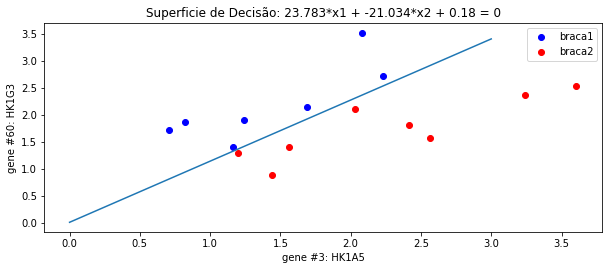

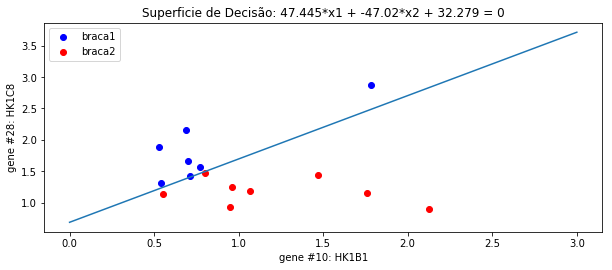

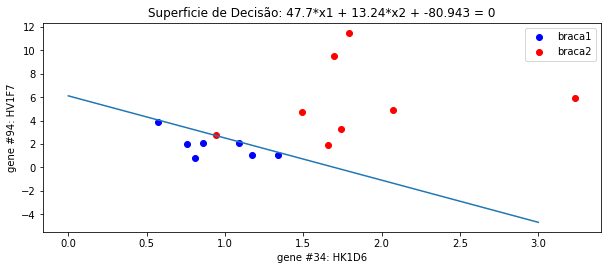

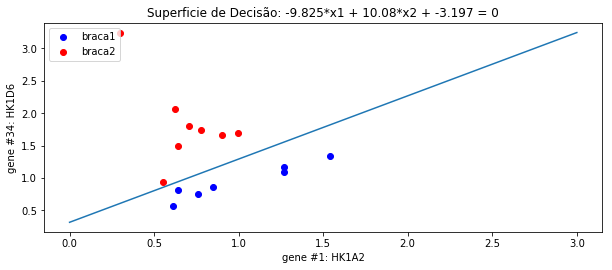

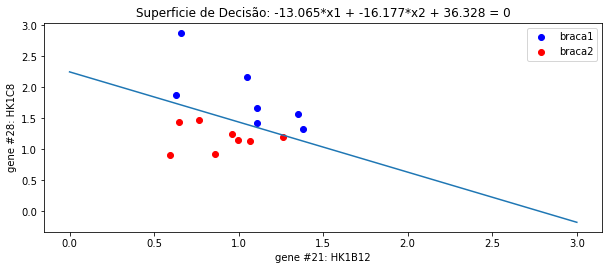

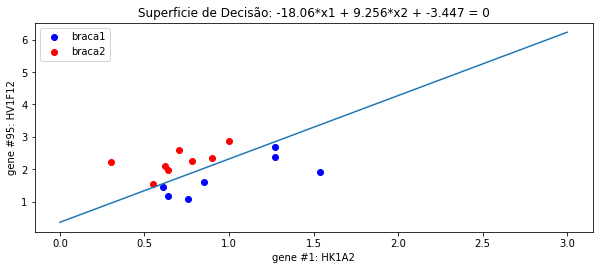

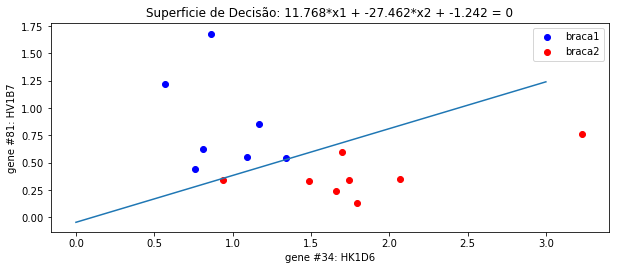

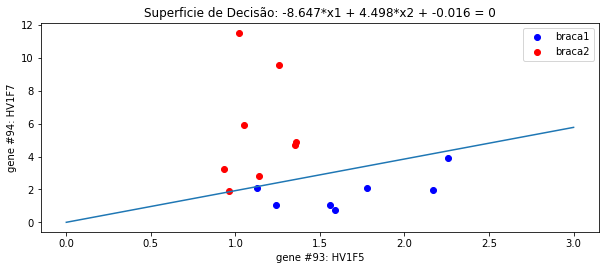

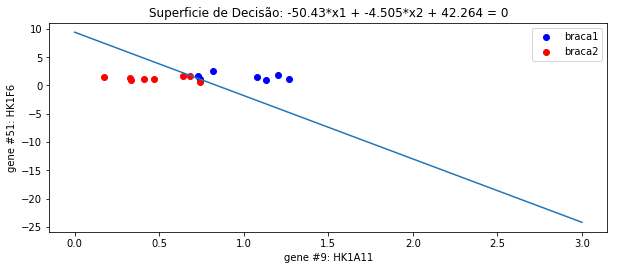

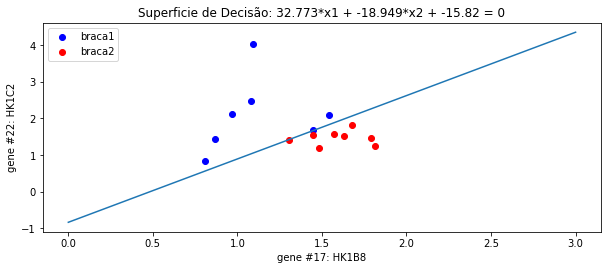

In [23]:
#gerar iterativamente os relatorios para o top10 dos valores de ganho
def relatorio_top10(best10):
    for i in range(1,11):
        plt.figure(i,figsize=(10,50))
        plt.subplot(11,1,i)
        relatorio(best10x[i-1][3],criar_sn(best10x[i-1][0],best10x[i-1][1]),best10x[i-1][0],best10x[i-1][1])

#imprimir relatorio dos 10 melhores
relatorio_top10(best10x)
print(best10x)